<a href="https://colab.research.google.com/github/Jodiedata/Bank-Customer-Churn-Prediction/blob/master/Bank_Customer_Churn_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Customer Churn Prediction

In this project, I use supervised learning models to identify customers who are likely to churn in the future. Furthermore, I will analyze top factors that influence user retention. [Dataset information](https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers).

## Contents


* [Part 1: Data Exploration](#Part-1:-Data-Exploration)
* [Part 2: Feature Preprocessing](#Part-2:-Feature-Preprocessing)
* [Part 3: Model Training and Results Evaluation](#Part-3:-Model-Training-and-Result-Evaluation)
* [Part 4: Feature Selection](#Part-4:-Feature-Selection)

#Part 0. load packages, load data

In [4]:
#import neccessary libraries
import numpy as np
import pandas as pd
import sklearn as sl
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('max_colwidth',100)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
from google.colab import files
uploaded = files.upload()

Saving bank.data.csv to bank.data.csv


In [6]:
churn_df=pd.read_table('bank.data.csv',header=0,sep=',',lineterminator='\n')
print(churn_df.head())
print ("Num of rows: " + str(churn_df.shape[0])) # row count
print ("Num of columns: " + str(churn_df.shape[1])) # col count

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.000              1          1               1   
1       1  83807.860              1          0               1   
2       8 159660.800              3          1               0   
3       1      0.000              2          0               0   
4       2 125510.820              1          1               1   

   EstimatedSalary  Exited\r  
0       101348.880         1  
1       112542.580         0  
2       113931.570         1  
3        93826.630         0  
4  

#Part 1. Exploratory Analysis and Data Visualization

##1.1 Exclude erroneous data

In [0]:
if churn_df.set_index('CustomerId').index.duplicated().sum()==0:
  print('No duplicated index.')

No duplicated index.


##1.2: Understand the Raw Dataset

In [7]:
# check data info
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
          10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# check the unique values for each column
churn_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited\r               2
dtype: int64

In [0]:
# Get target variable
y = churn_df['Exited\r']

In [10]:
# check the propotion of y = 1
print(y.sum() / y.shape * 100)

[20.37]


##1.3:  Understand numerical features

###1.3.1 Overview

In [11]:
# check missing values
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited\r           0
dtype: int64

In [12]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
          10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
print(churn_df.drop(columns=['CustomerId','RowNumber'],axis=1).describe(percentiles=[0.1,0.25,0.5,0.75,0.95]))

       CreditScore       Age    Tenure    Balance  NumOfProducts  HasCrCard  \
count    10000.000 10000.000 10000.000  10000.000      10000.000  10000.000   
mean       650.529    38.922     5.013  76485.889          1.530      0.706   
std         96.653    10.488     2.892  62397.405          0.582      0.456   
min        350.000    18.000     0.000      0.000          1.000      0.000   
10%        521.000    27.000     1.000      0.000          1.000      0.000   
25%        584.000    32.000     3.000      0.000          1.000      0.000   
50%        652.000    37.000     5.000  97198.540          1.000      1.000   
75%        718.000    44.000     7.000 127644.240          2.000      1.000   
95%        812.000    60.000     9.000 162711.669          2.000      1.000   
max        850.000    92.000    10.000 250898.090          4.000      1.000   

       IsActiveMember  EstimatedSalary  Exited\r  
count       10000.000        10000.000 10000.000  
mean            0.515       

In [14]:
(churn_df==0).sum(axis=0)/churn_df.shape[0]

RowNumber         0.000
CustomerId        0.000
Surname           0.000
CreditScore       0.000
Geography         0.000
Gender            0.000
Age               0.000
Tenure            0.041
Balance           0.362
NumOfProducts     0.000
HasCrCard         0.294
IsActiveMember    0.485
EstimatedSalary   0.000
Exited\r          0.796
dtype: float64

In [15]:
# understand Numerical feature
# discrete/continuous
# 'CreditScore', 'Age', 'Tenure', 'NumberOfProducts'
# 'Balance', 'EstimatedSalary'
churn_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,650.529,38.922,5.013,1.530,76485.889,100090.240
std,96.653,10.488,2.892,0.582,62397.405,57510.493
min,350.000,18.000,0.000,1.000,0.000,11.580
25%,584.000,32.000,3.000,1.000,0.000,51002.110
50%,652.000,37.000,5.000,1.000,97198.540,100193.915
75%,718.000,44.000,7.000,2.000,127644.240,149388.247
max,850.000,92.000,10.000,4.000,250898.090,199992.480


In [0]:
# Rename columns
churn_df.rename(columns={'Exited\r':'Exited'},inplace=True)

###1.3.2 'Exited' feature

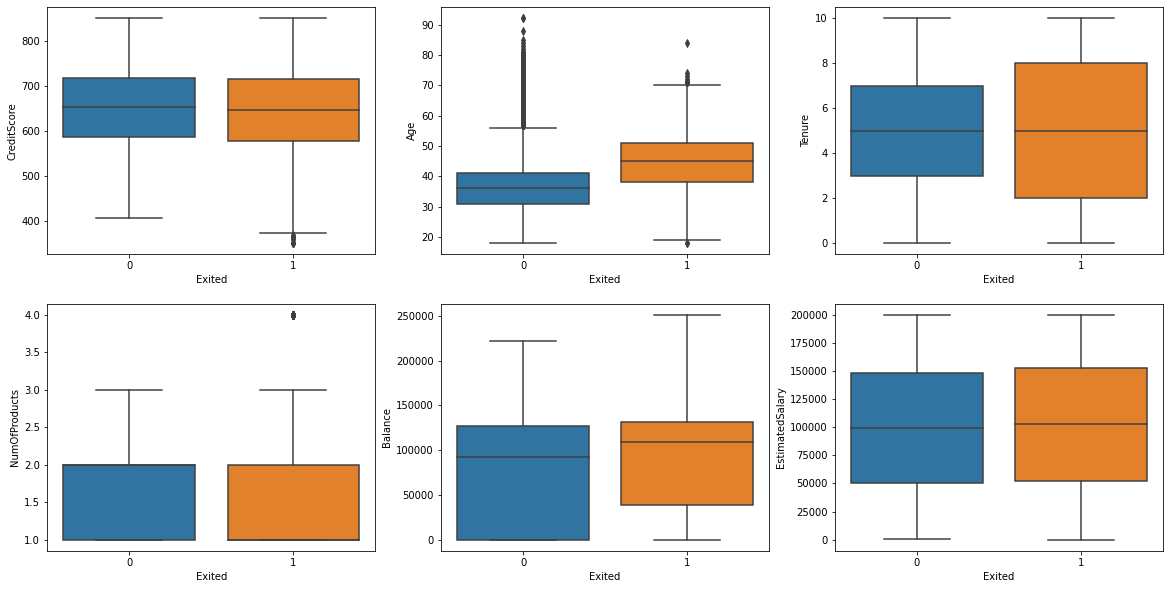

In [0]:
# boxplot for numerical feature
_,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='Exited', y ='CreditScore', data=churn_df, ax=axss[0][0])
sns.boxplot(x='Exited', y ='Age', data=churn_df, ax=axss[0][1])
sns.boxplot(x='Exited', y ='Tenure', data=churn_df, ax=axss[0][2])
sns.boxplot(x='Exited', y ='NumOfProducts', data=churn_df, ax=axss[1][0])
sns.boxplot(x='Exited', y ='Balance', data=churn_df, ax=axss[1][1])
sns.boxplot(x='Exited', y ='EstimatedSalary', data=churn_df, ax=axss[1][2])

insights:\
Senior people are more likely to churn.\
People have more banlance are more likely to churn.

###1.3.3 Distribution of 'Balance' and 'Estimated Salary'

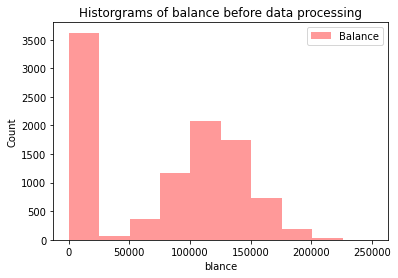

In [17]:
plt.hist(churn_df['Balance'], bins = 10, alpha = 0.4, color='r', histtype='stepfilled', label = 'Balance')
plt.legend(loc ='upper right')
plt.title('Historgrams of balance before data processing')
plt.xlabel('blance')
plt.ylabel('Count')
plt.show()


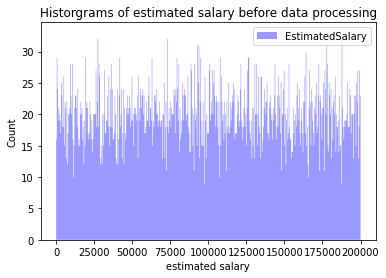

In [18]:
plt.hist(churn_df['EstimatedSalary'], bins = 500, alpha = 0.4, color='b', histtype='stepfilled', label = 'EstimatedSalary')
plt.legend(loc ='upper right')
plt.title('Historgrams of estimated salary before data processing')
plt.xlabel('estimated salary')
plt.ylabel('Count')
plt.show()

###1.2.3 Correlation among numerical features

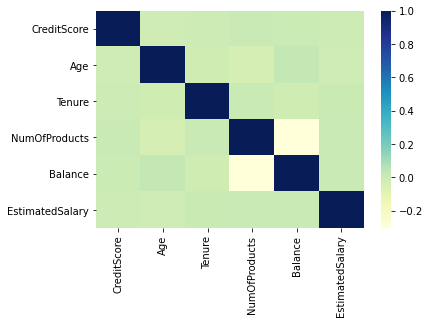

In [19]:
corr_score = churn_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].corr()

# show heapmap of correlations
sns.heatmap(corr_score,cmap="YlGnBu")

In [20]:
# check the actual values of correlations
corr_score

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
CreditScore,1.000,-0.004,0.001,0.012,0.006,-0.001
Age,-0.004,1.000,-0.010,-0.031,0.028,-0.007
Tenure,0.001,-0.010,1.000,0.013,-0.012,0.008
NumOfProducts,0.012,-0.031,0.013,1.000,-0.304,0.014
Balance,0.006,0.028,-0.012,-0.304,1.000,0.013
EstimatedSalary,-0.001,-0.007,0.008,0.014,0.013,1.000


## 1.4 Understand Categorical Features

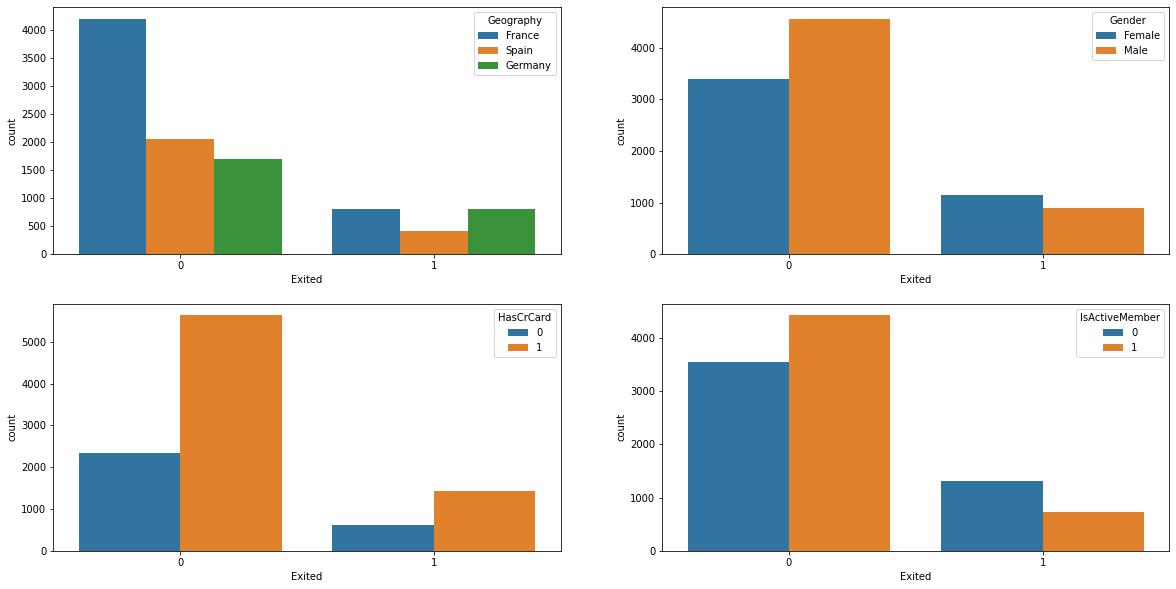

In [21]:
# understand categorical feature
# 'Geography', 'Gender'
# 'HasCrCard', 'IsActiveMember'
_,axss = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Exited', hue='Geography', data=churn_df, ax=axss[0][0])
sns.countplot(x='Exited', hue='Gender', data=churn_df, ax=axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=churn_df, ax=axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=churn_df, ax=axss[1][1])

Insights:\
Female are more likely to churn.\
Less active members are more likely to churn.

# Part 2: Feature Preprocessing

feature encoding, feature scaling

After very basic Exploratory Data Analysis, we have to do some data cleaning and data preprocessing.
We need three steps to finish  this.
First, we need to encode the categorical feature
Second, we need to impute the missing value for both numeric and categorical feature
Third, we need to scale out feature,which can be better for our models' performance

Read more for handling [categorical feature](https://github.com/scikit-learn-contrib/categorical-encoding), and there is an awesome package for [encoding](https://contrib.scikit-learn.org/categorical-encoding/#category-encoders).

In [0]:
# ordinal encoding
churn_df['Gender'] = churn_df['Gender'] == 'Female'

In [0]:
# one hot encoding
churn_df = pd.get_dummies(churn_df, columns=['Geography'], drop_first=True)

In [24]:
churn_df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,True,42,2,0.000,1,1,1,101348.880,1,0,0
1,2,15647311,Hill,608,True,41,1,83807.860,1,0,1,112542.580,0,0,1
2,3,15619304,Onio,502,True,42,8,159660.800,3,1,0,113931.570,1,0,0
3,4,15701354,Boni,699,True,39,1,0.000,2,0,0,93826.630,0,0,0
4,5,15737888,Mitchell,850,True,43,2,125510.820,1,1,1,79084.100,0,0,1
5,6,15574012,Chu,645,False,44,8,113755.780,2,1,0,149756.710,1,0,1
6,7,15592531,Bartlett,822,False,50,7,0.000,2,1,1,10062.800,0,0,0
7,8,15656148,Obinna,376,True,29,4,115046.740,4,1,0,119346.880,1,1,0
8,9,15792365,He,501,False,44,4,142051.070,2,0,1,74940.500,0,0,0
9,10,15592389,H?,684,False,27,2,134603.880,1,1,1,71725.730,0,0,0


In [0]:
# Get feature space by dropping useless feature
to_drop = ['RowNumber','CustomerId','Surname','Exited']
X = churn_df.drop(to_drop, axis=1)

In [26]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,True,42,2,0.000,1,1,1,101348.880,0,0
1,608,True,41,1,83807.860,1,0,1,112542.580,0,1
2,502,True,42,8,159660.800,3,1,0,113931.570,0,0
3,699,True,39,1,0.000,2,0,0,93826.630,0,0
4,850,True,43,2,125510.820,1,1,1,79084.100,0,1


# Part 3: Model Training and Result Evaluation

###3.1 Feature scaling

The impact of different scaling methods on the model performance is small. In the following model training and selections, the standard scaling (sc) data is used.

In [27]:
# Scale the data, using standardization
# standardization (x-mean)/std
# normalization (x-x_min)/(x_max-x_min) ->[0,1]

# 1. speed up gradient descent
# 2. same scale
# 3. algorithm requirments

# for example, use training data to train the standardscaler to get mean and std 
# apply mean and std to both training and testing data.
# fit_transform does the training and applying, transform only does applying.
# Because we can't use any info from test, and we need to do the same modification
# to testing data as well as training data

# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
# https://scikit-learn.org/stable/modules/preprocessing.html


# min-max example: (x-x_min)/(x_max-x_min)
# [1,2,3,4,5,6] -> fit(min:1, max:6) (scalar.min = 1, scalar.max = 6) -> transform [(1-1)/(6-1),(2-1)/(6-1)..]
# scalar.fit(train) -> min:1, max:100
# scalar.transform(apply to x) -> apply min:1, max:100 to X_train
# scalar.transform -> apply min:1, max:100 to X_test

# scalar.fit -> mean:1, std:100
# scalar.transform -> apply mean:1, std:100 to X_train
# scalar.transform -> apply mean:1, std:100 to X_test

from sklearn.preprocessing import StandardScaler
scale_lst = ['CreditScore','Age','Tenure','NumOfProducts','Balance','EstimatedSalary']
scaler = StandardScaler()
scaler.fit(X[scale_lst])
X[scale_lst] = scaler.transform(X[scale_lst])

X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,-0.326,True,0.294,-1.042,-1.226,-0.912,1,1,0.022,0,0
1,-0.440,True,0.198,-1.388,0.117,-0.912,0,1,0.217,0,1
2,-1.537,True,0.294,1.033,1.333,2.527,1,0,0.241,0,0
3,0.502,True,0.007,-1.388,-1.226,0.808,0,0,-0.109,0,0
4,2.064,True,0.389,-1.042,0.786,-0.912,1,1,-0.365,0,1


###3.2 Split the data

In [28]:
# Splite data into training and testing
from sklearn import model_selection

# Reserve 20% for testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 7500 observation with 11 features
test data has 2500 observation with 11 features


###3.3: Model Training and Selection

In [0]:
# build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn import svm

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

#SVM
classifier_SVM = svm.SVC() 

In [0]:
# Train the model
#classifier_logistic.fit(X_train, y_train)

In [0]:
# Prediction of test data
#classifier_logistic.predict(X_test)

In [0]:
# Accuracy of test data
#classifier_logistic.score(X_test, y_test)

In [30]:
# Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression','KNN','Random Forest','SVM']
model_list = [classifier_logistic, classifier_KNN, classifier_RF, classifier_SVM]
count = 0

for classifier in model_list:
  if count<=len(model_list):
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[0.81733333 0.80866667 0.814      0.80266667 0.81533333]
Model accuracy of Logistic Regression is 0.8116
[0.84866667 0.84666667 0.84133333 0.84066667 0.84333333]
Model accuracy of KNN is 0.8441333333333334
[0.858      0.86133333 0.86266667 0.85866667 0.866     ]
Model accuracy of Random Forest is 0.8613333333333333
[0.85866667 0.85866667 0.85666667 0.86066667 0.86266667]
Model accuracy of SVM is 0.8594666666666667


###3.4 Use Grid Search to Find Optimal Hyperparameters

In [0]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

####3.4.1 Find Optimal Hyperparameters - LogisticRegression

In [32]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the lambda value(weight) for L1 and L2

# ('l1', 1) ('l1', 5) ('l1', 10) ('l2', 1) ('l2', 5) ('l2', 10)
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.01, 0.1, 1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (0.01, 0.1, 1, 5, 10), 'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [33]:
# the best hyperparameter combination
print_grid_search_metrics(Grid_LR)

Best score: 0.8137333333333332
Best parameters set:
C:0.1
penalty:l1


In [0]:
# best model
best_LR_model = Grid_LR.best_estimator_

####3.4.2 Find Optimal Hyperparameters: KNN

In [35]:
# Possible hyperparamter options for KNN
# Choose k
parameters = {
    'n_neighbors':[1,3,5,7,9] 
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [36]:
# best k
print_grid_search_metrics(Grid_KNN)

Best score: 0.8478666666666665
Best parameters set:
n_neighbors:9


In [0]:
best_KNN_model = Grid_KNN.best_estimator_

####3.4.3 Find Optimal Hyperparameters: Random Forest

In [38]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [39]:
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.8626666666666667
Best parameters set:
n_estimators:60


In [0]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

####3.4.4 Find Optimal Hyperparameters: Support Vector Machines

In [41]:
# Possible hyperparamter options for SVM
# Choose kernal 
parameters = {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}
Grid_SVM = GridSearchCV(svm.SVC(),parameters, cv=5)
Grid_SVM.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [42]:
# best gmma and C
print_grid_search_metrics(Grid_SVM)

Best score: 0.8502666666666666
Best parameters set:
C:1000
gamma:0.001
kernel:rbf


In [0]:
# best SVM model
best_SVM_model = Grid_SVM.best_estimator_

###3.5 Model Evaluation 

class of interest as positive

TP: correctly labeled real churn

Precision(PPV, positive predictive value): tp / (tp + fp);
Total number of true predictive churn divided by the total number of predictive churn;
High Precision means low fp, not many return users were predicted as churn users. 


Recall(sensitivity, hit rate, true positive rate): tp / (tp + fn)
Predict most postive or churn user correctly. High recall means low fn, not many churn users were predicted as return users.

####3.5.1 Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Retain','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for ' + classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

In [0]:
#confusion_matrix(y_test,best_RF_model.predict(X_test))

Random Forest
Accuracy is: 0.8636
precision is: 0.7745098039215687
recall is: 0.4656188605108055


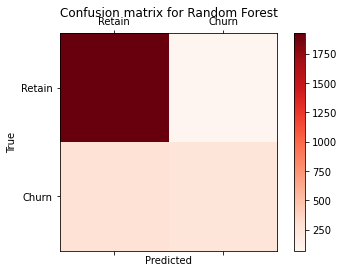

Logistic Regression
Accuracy is: 0.806
precision is: 0.5689655172413793
recall is: 0.1944990176817289


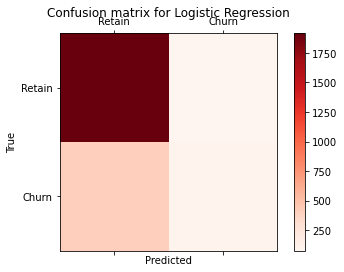

K nearest neighbor
Accuracy is: 0.8424
precision is: 0.684887459807074
recall is: 0.41846758349705304


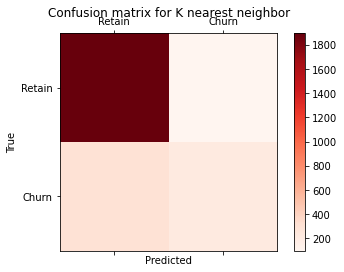

Support Vector Moachines
Accuracy is: 0.85
precision is: 0.8418367346938775
recall is: 0.3241650294695481


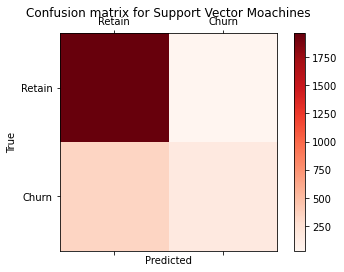

In [45]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test))),
    ('Support Vector Moachines', confusion_matrix(y_test, best_SVM_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

Random Forest has the best performance

#### 3.5.2 Model Evaluation - ROC & AUC

ROC of RF Model

In [0]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

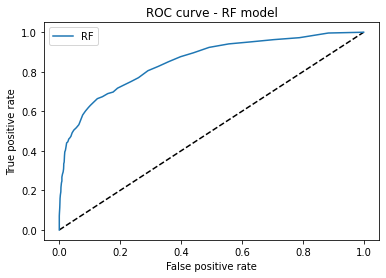

In [47]:
# ROC curve of Random Forest result
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [48]:
from sklearn import metrics

# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.8513566451783516

ROC of LR Model

In [0]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thres = roc_curve(y_test, y_pred_lr)

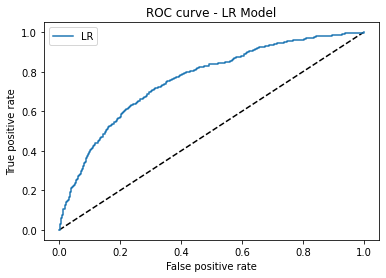

In [50]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [51]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.7596828162882283

ROC of KNN Model

In [0]:
y_pred_knn = best_KNN_model.predict(X_test)
fpr_knn, tpr_knn, thres = roc_curve(y_test, y_pred_knn)

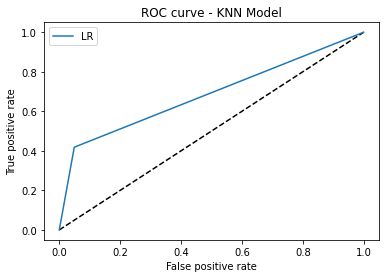

In [53]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - KNN Model')
plt.legend(loc='best')
plt.show()

In [54]:
metrics.auc(fpr_knn, tpr_knn)

0.6846230433808722

ROC of SVM Model

In [0]:
y_pred_svm = best_SVM_model.predict(X_test)
fpr_svm, tpr_svm, thres = roc_curve(y_test, y_pred_svm)

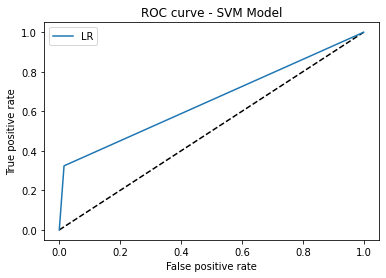

In [56]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svm, tpr_svm, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - SVM Model')
plt.legend(loc='best')
plt.show()

In [57]:
metrics.auc(fpr_svm, tpr_svm)

0.654297482087863

# Part 4: Feature Importance

###4.1 Logistic Regression Model - Feature Selection Discussion 

The corelated features that we are interested in

In [58]:
# add L1 regularization to logistic regression
# check the coef for feature selection
scaler = StandardScaler()
X_l1 = scaler.fit_transform(X)
LRmodel_l1 = LogisticRegression(penalty="l1", C = 0.01, solver='liblinear')
LRmodel_l1.fit(X_l1, y)

indices = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]

print ("Logistic Regression (L1) Coefficients")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(LRmodel_l1.coef_[0][indices[ind]], 4)))

Logistic Regression (L1) Coefficients
Age : 0.6469
IsActiveMember : -0.4191
Geography_Germany : 0.2719
Gender : 0.1802
Balance : 0.1133
NumOfProducts : -0.0029
Geography_Spain : 0.0
EstimatedSalary : 0.0
HasCrCard : 0.0
Tenure : 0.0
CreditScore : 0.0


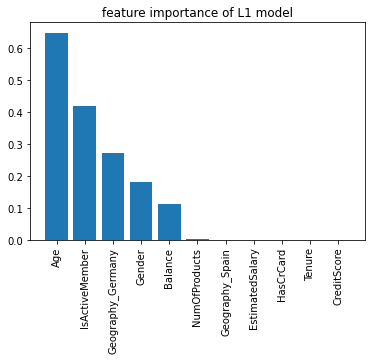

In [59]:
feature_name = X_train.columns.values
importances_l1 = abs(LRmodel_l1.coef_[0])
plt.figure(1)
axes = plt.gca()
plt.bar(feature_name[indices], importances_l1[indices])
plt.title('feature importance of L1 model')
plt.xticks(rotation=90)
#axes.set_ylim([-0.2,0.5])
plt.show()

In [60]:
# add L2 regularization to logistic regression
# check the coef for feature selection
np.random.seed()
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X)
LRmodel_l2 = LogisticRegression(penalty="l2", C = 0.1, solver='liblinear', random_state=42)
LRmodel_l2.fit(X_l2, y)
LRmodel_l2.coef_[0]

indices = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print ("Logistic Regression (L2) Coefficients")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(LRmodel_l2.coef_[0][indices[ind]], 4)))
  

Logistic Regression (L2) Coefficients
Age : 0.7509
IsActiveMember : -0.5271
Geography_Germany : 0.3313
Gender : 0.2591
Balance : 0.1624
CreditScore : -0.0637
NumOfProducts : -0.0585
Tenure : -0.0452
EstimatedSalary : 0.0272
HasCrCard : -0.0199
Geography_Spain : 0.0139


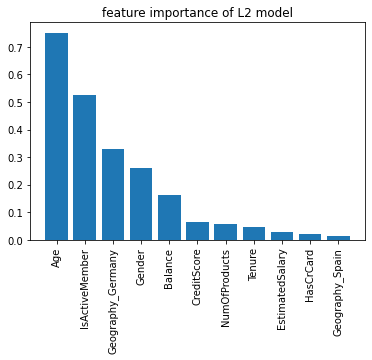

In [61]:
feature_name = X_train.columns.values
plt.figure(1)
importances_l2 = abs(LRmodel_l2.coef_[0])
axes = plt.gca()
plt.bar(feature_name[indices], importances_l2[indices])
plt.title('feature importance of L2 model')
plt.xticks(rotation=90)
plt.show()

###4.2 Random Forest Model - Feature Importance Discussion

In [62]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Age : 0.2375
EstimatedSalary : 0.1462
CreditScore : 0.1455
Balance : 0.1433
NumOfProducts : 0.1288
Tenure : 0.0819
IsActiveMember : 0.0414
Geography_Germany : 0.0267
HasCrCard : 0.0183
Gender : 0.0173
Geography_Spain : 0.0131


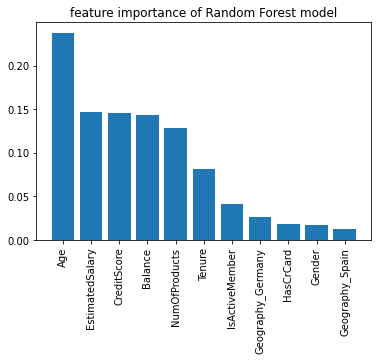

In [63]:
feature_name = X_train.columns.values
plt.figure(1)
plt.bar(feature_name[indices], importances[indices])
plt.title('feature importance of Random Forest model')
plt.xticks(rotation=90)
plt.show()